In [1]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
from scipy.integrate import solve_ivp
style.use('seaborn')
rcParams['figure.figsize'] = 10, 10

Let $\mathbf{x}_1(t), \mathbf{x}_2(t), \mathbf{x}_3(t) \in \mathbb{R}^3$ be the positions of the three bodies, which have masses $m_1, m_2, m_3 \geq 0$. Then if $G$ is the universal gravitational constant, the equations of motion are
$$ 
\mathbf{x}_1''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_1(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_1(t)\|^3}
+ \frac{G m_3 (\mathbf{x}_3(t) - \mathbf{x}_1(t))}{\|\mathbf{x}_3(t) - \mathbf{x}_1(t)\|^3}
$$
$$ 
\mathbf{x}_2''(t) = \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_2(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_2(t)\|^3}
+ \frac{G m_3 (\mathbf{x}_3(t) - \mathbf{x}_2(t))}{\|\mathbf{x}_3(t) - \mathbf{x}_2(t)\|^3}
$$
$$ 
\mathbf{x}_3''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_3(t)\|^3}
+ \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_3(t)\|^3}
$$

In the limit that $m_3 \to 0$, the first two equations become their own system:
$$ 
\mathbf{x}_1''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_1(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_1(t)\|^3}
; \qquad  
\mathbf{x}_2''(t) = \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_2(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_2(t)\|^3}
$$


and the third mass evolves in time depending on the solution for the first two masses:

$$ 
\mathbf{x}_3''(t) = \frac{G m_2 (\mathbf{x}_2(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_2(t) - \mathbf{x}_3(t)\|^3}
+ \frac{G m_1 (\mathbf{x}_1(t) - \mathbf{x}_3(t))}{\|\mathbf{x}_1(t) - \mathbf{x}_3(t)\|^3}
$$

In [2]:
def gravity_acceleration(t, x, m1=1, m2=1):
    """
    
    Parameters:
        x (ndarray, length 18) xyz coordinates of 3 bodies, followed by their velocities
    """
    # Extract coordinates
    v = x[9:]
    x1, x2, x3 = x[:3], x[3:6], x[6:9]
    
    # Get body distances
    sqdist12 = np.sum(np.square(x2-x1))
    sqdist13 = np.sum(np.square(x3-x1))
    sqdist23 = np.sum(np.square(x3-x2))
    
    # Construct the acceleration due to gravity
    a = np.zeros(9)
    
    a[:3] = m2*(x2-x1)/np.power(sqdist12, 1.5)
    a[3:6] = m1*(x1-x2)/np.power(sqdist12, 1.5)
    a[6:9] = m2*(x2-x3)/np.power(sqdist23, 1.5) + m1*(x1-x3)/np.power(sqdist13, 1.5)
    
    # Return the result
    return np.concatenate((v,a))
    

Important: the plotting scheme below assumes the z coordinates of the initial condition are zero (these are indices 2, 5, 8, 11, 14, 17)

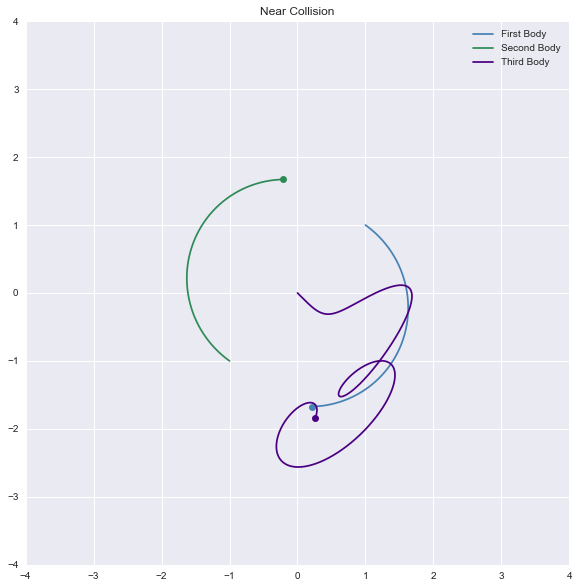

In [75]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .3, -.3, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

# Plot the solutions, assuming we have
fig, ax = plt.subplots()

# First body
first = ax.plot(sol[0, :], sol[1, :], color='steelblue', label='First Body')
ax.plot(sol[0, -1], sol[1, -1], color='steelblue', marker='o')

# Second body
second = ax.plot(sol[3, :], sol[4, :], color='seagreen', label='Second Body')
ax.plot(sol[3, -1], sol[4, -1], color='seagreen', marker='o')

# Third body
third = ax.plot(sol[6, :], sol[7, :], color='indigo', label='Third Body')
ax.plot(sol[6, -1], sol[7, -1], color='indigo', marker='o')

# Set plot parameters and labels
ax.set_title('Near Collision')
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()


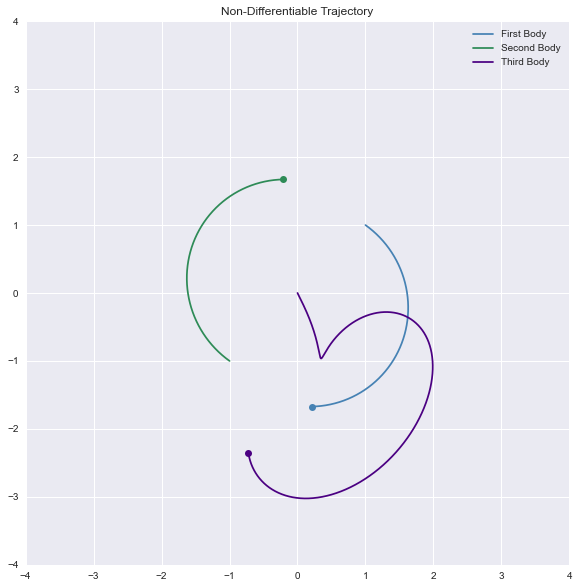

In [74]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .3, -.6, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

# Plot the solutions, assuming we have
fig, ax = plt.subplots()

# First body
first = ax.plot(sol[0, :], sol[1, :], color='steelblue', label='First Body')
ax.plot(sol[0, -1], sol[1, -1], color='steelblue', marker='o')

# Second body
second = ax.plot(sol[3, :], sol[4, :], color='seagreen', label='Second Body')
ax.plot(sol[3, -1], sol[4, -1], color='seagreen', marker='o')

# Third body
third = ax.plot(sol[6, :], sol[7, :], color='indigo', label='Third Body')
ax.plot(sol[6, -1], sol[7, -1], color='indigo', marker='o')

# Set plot parameters and labels
ax.set_title('Non-Differentiable Trajectory')
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()


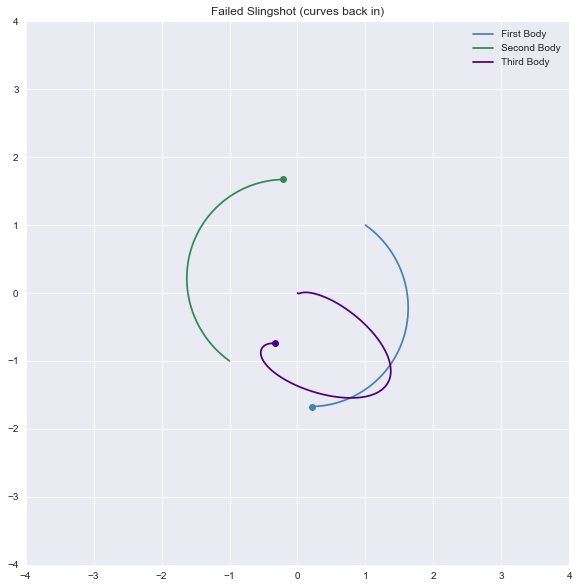

In [73]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 .01, -.01, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

# Plot the solutions, assuming we have
fig, ax = plt.subplots()

# First body
first = ax.plot(sol[0, :], sol[1, :], color='steelblue', label='First Body')
ax.plot(sol[0, -1], sol[1, -1], color='steelblue', marker='o')

# Second body
second = ax.plot(sol[3, :], sol[4, :], color='seagreen', label='Second Body')
ax.plot(sol[3, -1], sol[4, -1], color='seagreen', marker='o')

# Third body
third = ax.plot(sol[6, :], sol[7, :], color='indigo', label='Third Body')
ax.plot(sol[6, -1], sol[7, -1], color='indigo', marker='o')

# Set plot parameters and labels
ax.set_title('Failed Slingshot (curves back in)')
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()


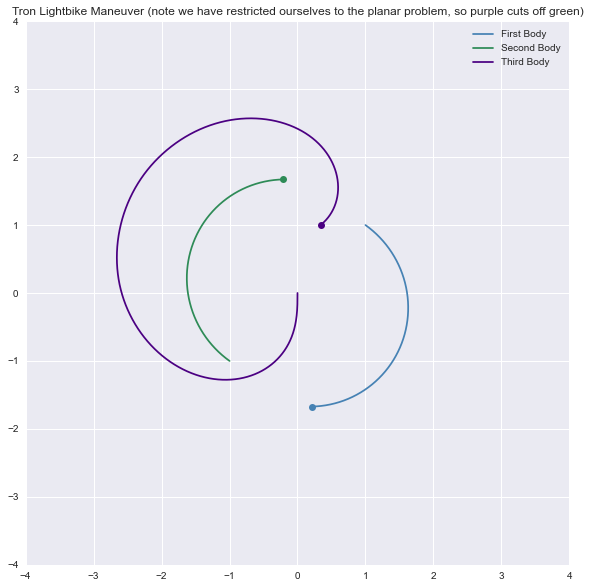

In [72]:
# Set up initial conditions and parameters
t0 = 0
tf = 10
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 0, -.7, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

# Plot the solutions, assuming we have
fig, ax = plt.subplots()

# First body
first = ax.plot(sol[0, :], sol[1, :], color='steelblue', label='First Body')
ax.plot(sol[0, -1], sol[1, -1], color='steelblue', marker='o')

# Second body
second = ax.plot(sol[3, :], sol[4, :], color='seagreen', label='Second Body')
ax.plot(sol[3, -1], sol[4, -1], color='seagreen', marker='o')

# Third body
third = ax.plot(sol[6, :], sol[7, :], color='indigo', label='Third Body')
ax.plot(sol[6, -1], sol[7, -1], color='indigo', marker='o')

# Set plot parameters and labels
ax.set_title('Tron Lightbike Maneuver (note we have restricted ourselves to the planar problem, so purple cuts off green)')
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()


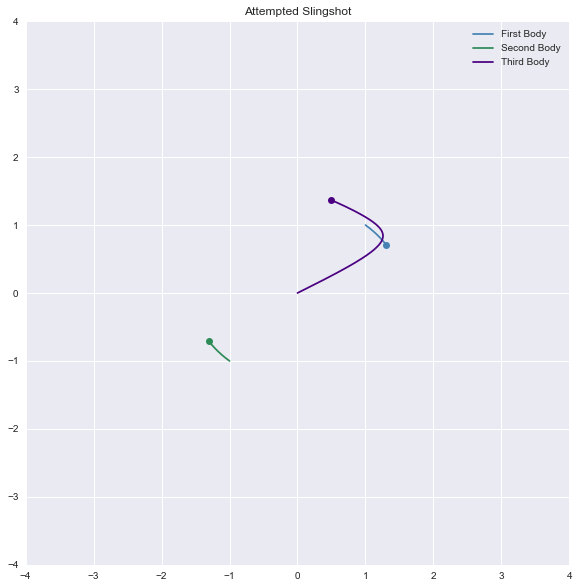

In [69]:
# Set up initial conditions and parameters
t0 = 0
tf = 1
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 .35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2, 1, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y

# Plot the solutions, assuming we have
fig, ax = plt.subplots()

# First body
first = ax.plot(sol[0, :], sol[1, :], color='steelblue', label='First Body')
ax.plot(sol[0, -1], sol[1, -1], color='steelblue', marker='o')

# Second body
second = ax.plot(sol[3, :], sol[4, :], color='seagreen', label='Second Body')
ax.plot(sol[3, -1], sol[4, -1], color='seagreen', marker='o')

# Third body
third = ax.plot(sol[6, :], sol[7, :], color='indigo', label='Third Body')
ax.plot(sol[6, -1], sol[7, -1], color='indigo', marker='o')

# Set plot parameters and labels
ax.set_title('Attempted Slingshot')
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()


This is the closest we could get to a successful slingshot maneuver on this first attempt.  We came by this mostly by trial and error.  Though we have a long way to go, we note that the third body does indeed gain velocity and change direction by passing very close to the first body, so this is a solid initial model and illustrates our goal.

We further note that this is a very simple toy problem, with the first two primary bodies having mass of unity and the third body being considered as massless, so the masses, velocities, and positions for this model are pretty much meaningless, and only give us information relative to this model.